In [141]:
import json
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [142]:
path = "../model/old_results"
skip = [
        #"baseline", "bert+similarity", "stringconcat", "l1_examples", "pretrained_examples", "similarity_only", "full_data",
        "2 3e-5", "4 3e-5", "4 4e-5", "8 1e-3", "8 2e-5", "8 3e-4", "8 3e-5", "8 3e-6", "8 4e-5", "full_data",
        ]
models = {}
for model_name in os.listdir(path):
    if model_name in skip: continue
    with open(f"{path}/{model_name}/trainer_state.json", "r") as file:
        trainer_state = json.load(file)
        model = dict()
        model['epochs'] = int(trainer_state['epoch'])
        model['best_metric'] = trainer_state['best_metric']
        model['train_loss'] = [epoch['loss'] for epoch in trainer_state['log_history'] if 'loss' in epoch]
        model['eval_loss'] = [epoch['eval_loss'] for epoch in trainer_state['log_history'] if 'eval_loss' in epoch]
        model['f1'] = [epoch['eval_macro-avg-f1score'] for epoch in trainer_state['log_history'] if 'eval_macro-avg-f1score' in epoch]
        models[model_name] = model

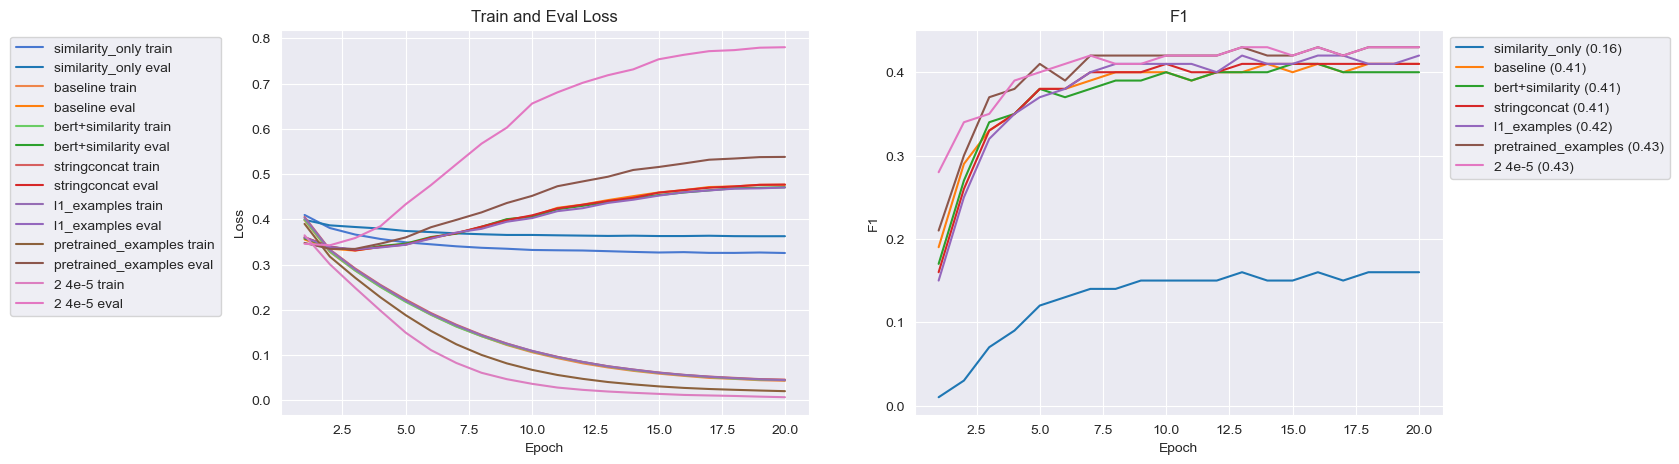

In [143]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

for idx, (model_name, model) in enumerate(models.items()):
    sns.lineplot(x=range(1, model['epochs']+1), y=model['train_loss'], label=f"{model_name} train", ax=ax[0], color=sns.color_palette("muted")[idx])
    sns.lineplot(x=range(1, model['epochs']+1), y=model['eval_loss'], label=f"{model_name} eval", ax=ax[0], color=sns.color_palette()[idx])
    sns.lineplot(x=range(1, model['epochs']+1), y=model['f1'], label=f"{model_name} ({model['best_metric']})", ax=ax[1], color=sns.color_palette()[idx])

ax[0].set_title("Train and Eval Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend(bbox_to_anchor=(-0.1, 1), loc='upper right')

ax[1].set_title("F1")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("F1")
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()